# Impute location code

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Import libaries for handling location related information
import geopy
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import plotly_express as px
from shapely.geometry import point
from geopandas import GeoDataFrame
import pylab

from uszipcode import SearchEngine

# To see all the columns 
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 300)

PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name


In [6]:
crashes = pd.read_csv("C:\\CompletePython\\DataScience\VisionZero\\2016\\full.csv", low_memory=False)

In [7]:
crashes.shape

(518491, 40)

In [8]:
crashes.columns

Index(['Unnamed: 0', 'crash_date', 'crash_time', 'person_type',
       'person_injury', 'person_age', 'ejection', 'emotional_status',
       'bodily_injury', 'position_in_vehicle', 'safety_equipment', 'complaint',
       'ped_role', 'person_sex', 'vehicle_type', 'vehicle_make',
       'vehicle_year', 'vehicle_occupants', 'driver_sex',
       'driver_license_status', 'pre_crash', 'point_of_impact',
       'vehicle_damage', 'contributing_factor_1', 'contributing_factor_2',
       'borough', 'zip_code', 'latitude', 'longitude', 'on_street_name',
       'collision_id', 'number_of_contributing_vehicles',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed'],
      dtype='object')

In [9]:
crashes.nunique().sort_values(ascending=False)

Unnamed: 0                         411098
collision_id                       104878
latitude                            34581
longitude                           27380
on_street_name                       5952
crash_date                           2012
crash_time                           1439
vehicle_make                         1231
vehicle_type                          309
person_age                            288
zip_code                              212
vehicle_year                          100
contributing_factor_2                  55
contributing_factor_1                  55
vehicle_occupants                      47
complaint                              21
point_of_impact                        19
vehicle_damage                         19
pre_crash                              19
safety_equipment                       17
number_of_motorist_injured             16
number_of_persons_injured              16
bodily_injury                          14
position_in_vehicle               

In [10]:
crashes.dtypes

Unnamed: 0                           int64
crash_date                          object
crash_time                          object
person_type                         object
person_injury                       object
person_age                         float64
ejection                            object
emotional_status                    object
bodily_injury                       object
position_in_vehicle                 object
safety_equipment                    object
complaint                           object
ped_role                            object
person_sex                          object
vehicle_type                        object
vehicle_make                        object
vehicle_year                       float64
vehicle_occupants                  float64
driver_sex                          object
driver_license_status               object
pre_crash                           object
point_of_impact                     object
vehicle_damage                      object
contributin

In [11]:
crashes.isnull().sum().sort_values(ascending=False)

driver_license_status              321333
driver_sex                         314014
vehicle_make                       305494
vehicle_year                       303963
pre_crash                          301265
contributing_factor_2              301209
vehicle_occupants                  301131
vehicle_type                       301038
vehicle_damage                     300989
point_of_impact                    300785
contributing_factor_1              300532
ejection                           292527
safety_equipment                   292504
position_in_vehicle                292483
emotional_status                   286887
bodily_injury                      286883
complaint                          286877
zip_code                           199771
borough                            199673
person_age                         135089
person_sex                         127491
on_street_name                     110174
ped_role                            95760
crash_date                        

In [ ]:
ax = df['name'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
ax.set_xlabel("Owner Names")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

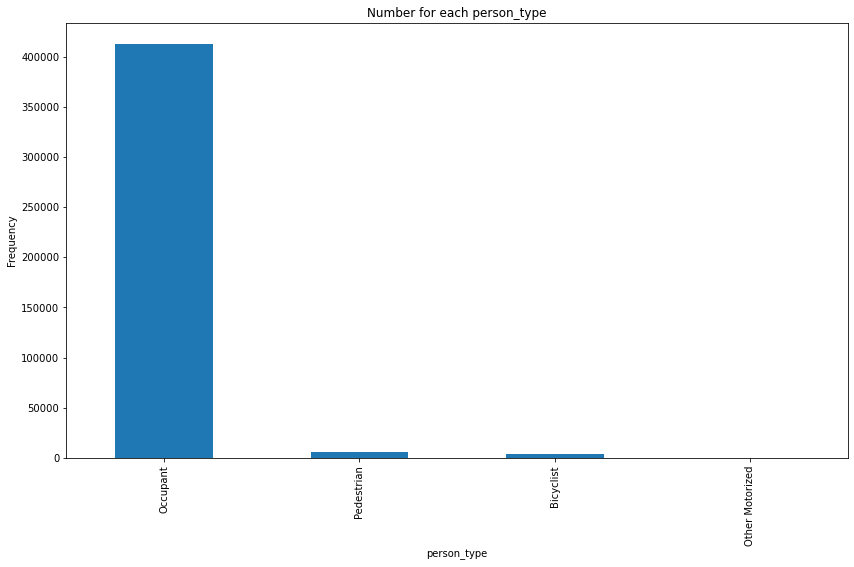

In [12]:
ax = crashes['person_type'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each person_type")
ax.set_xlabel("person_type")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

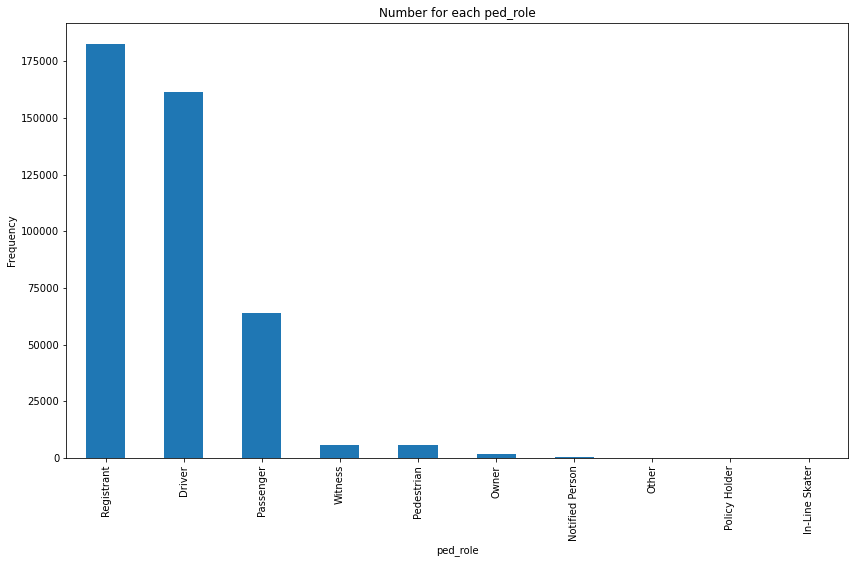

In [13]:
ax = crashes['ped_role'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each ped_role")
ax.set_xlabel("ped_role")
ax.set_ylabel("Frequency")